In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

**Dataset 1: 'time_series_covid19_confirmed_global' dataset which consists of the data related to the cumulative number of confirmed cases in each Country.**

In [2]:
confirmed_cases_raw= pd.read_csv("time_series_covid19_confirmed_global.csv")
print("DataFrame shape =" + str(confirmed_cases_raw.shape))
confirmed_cases_raw.head(2)

DataFrame shape =(275, 466)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736


In [3]:
confirmed_cases_p1 = confirmed_cases_raw.drop(["Lat","Long"], axis=1, inplace=False)
print("DataFrame shape =" + str(confirmed_cases_p1.shape))
confirmed_cases_p1.head(2)

DataFrame shape =(275, 464)


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736


In [4]:
confirmed_cases_CountryWise= confirmed_cases_p1.groupby("Country/Region").sum()
print("DataFrame shape =" + str(confirmed_cases_CountryWise.shape))
confirmed_cases_CountryWise.head(2)

DataFrame shape =(192, 462)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736


In [5]:
countries= list(confirmed_cases_CountryWise.index)

In [6]:
# Average number of new cases per day for each country
av_daily_cases= []
for c in countries:              
  av_daily_cases.append(confirmed_cases_CountryWise.loc[c].diff().mean())

**Dataset 2: 'time_series_covid19_deaths_global' dataset which consists of the data related to cumulative number of deaths in each Country.**

In [7]:
deaths_raw= pd.read_csv("time_series_covid19_deaths_global.csv")
print("DataFrame shape =" + str(deaths_raw.shape))
deaths_raw.head(2)

DataFrame shape =(275, 466)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383


In [8]:
deaths_p1 = deaths_raw.drop(["Lat","Long"], axis=1, inplace=False)
print("DataFrame shape =" + str(deaths_p1.shape))
deaths_p1.head(2)

DataFrame shape =(275, 464)


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383


In [9]:
deaths_CountryWise= deaths_p1.groupby("Country/Region").sum()
print("DataFrame shape =" + str(deaths_CountryWise.shape))
deaths_CountryWise.head(2)

DataFrame shape =(192, 462)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383


In [10]:
# Average number of deaths per day for each country
av_daily_deaths= []
for c in countries:              
  av_daily_deaths.append(deaths_CountryWise.loc[c].diff().mean())

Text(0, 0.5, 'Count')

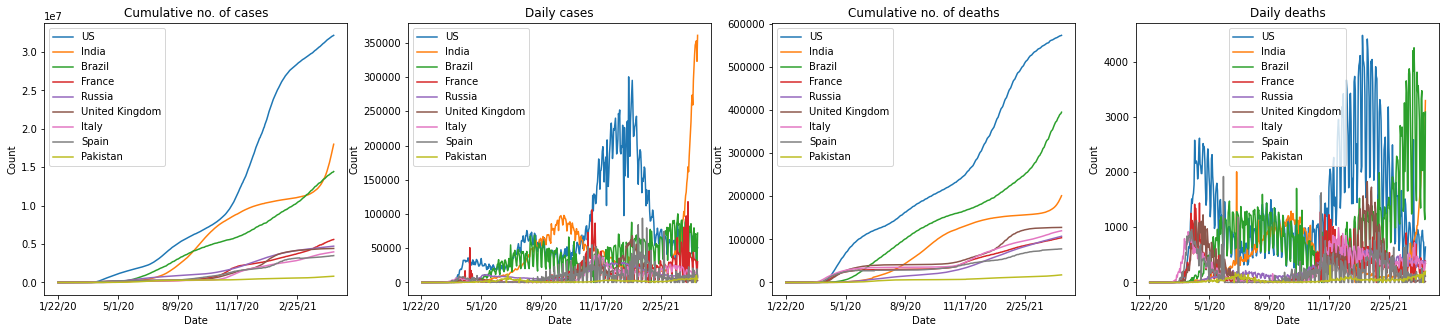

In [11]:
countries_sub= ["US","India","Brazil","France","Russia","United Kingdom","Italy","Spain","Pakistan"]

fig, axes = plt.subplots(1, 4, figsize=(25,5))
for c in countries_sub:
  confirmed_cases_CountryWise.loc[c].plot(ax=axes[0])
axes[0].legend(); axes[0].set_title('Cumulative no. of cases'); axes[0].set_xlabel('Date'); axes[0].set_ylabel('Count')

for c in countries_sub:
  np.abs(confirmed_cases_CountryWise.loc[c].diff()).plot(ax=axes[1])
axes[1].legend(); axes[1].set_title('Daily cases'); axes[1].set_xlabel('Date'); axes[1].set_ylabel('Count')

for c in countries_sub:
  deaths_CountryWise.loc[c].plot(ax=axes[2])
axes[2].legend(); axes[2].set_title('Cumulative no. of deaths'); axes[2].set_xlabel('Date'); axes[2].set_ylabel('Count')

for c in countries_sub:
  np.abs(deaths_CountryWise.loc[c].diff()).plot(ax=axes[3])
axes[3].legend(); axes[3].set_title('Daily deaths'); axes[3].set_xlabel('Date'); axes[3].set_ylabel('Count')

**Dataset 3: World happiness report (an annual publication of the United Nations that contains scores given by people living in different countries about the quality of their life).**

In [12]:
happiness_data= pd.read_csv("worldwide_happiness_report.csv")
print("DataFrame shape =" + str(happiness_data.shape))
happiness_data.head(2)

DataFrame shape =(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [13]:
happiness_data= happiness_data.set_index("Country or region")

In [14]:
happiness_data= happiness_data.rename_axis("Country/Region")
happiness_data.head(2)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country/Region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410


**Merging datasets 1 and 3 into a unified dataset**

In [15]:
confirmed_cases_CountryWise["Daily case average"]= av_daily_cases
confirmed_cases_CountryWise.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,Daily case average
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,128.470716
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,283.592191


In [16]:
df1= pd.DataFrame(confirmed_cases_CountryWise["Daily case average"])

In [17]:
df = df1.join(happiness_data)
df.head(2)

,Daily case average,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country/Region,,,,,,,,,
Afghanistan,128.470716,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,283.592191,107.0,4.719,0.947,0.848,0.874,0.383,0.178,0.027


In [18]:
df.corr()

,Daily case average,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Daily case average,1.000000,-0.116747,0.105413,0.163880,0.093346,0.144722,0.045411,-0.085630,-0.024520
Overall rank,-0.116747,1.000000,-0.989127,-0.803665,-0.776393,-0.806767,-0.568654,-0.070804,-0.388395
Score,0.105413,-0.989127,1.000000,0.795413,0.784094,0.801891,0.585119,0.097775,0.419293
GDP per capita,0.163880,-0.803665,0.795413,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759
Social support,0.093346,-0.776393,0.784094,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333
Healthy life expectancy,0.144722,-0.806767,0.801891,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566
Freedom to make life choices,0.045411,-0.568654,0.585119,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845
Generosity,-0.085630,-0.070804,0.097775,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430
Perceptions of corruption,-0.024520,-0.388395,0.419293,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

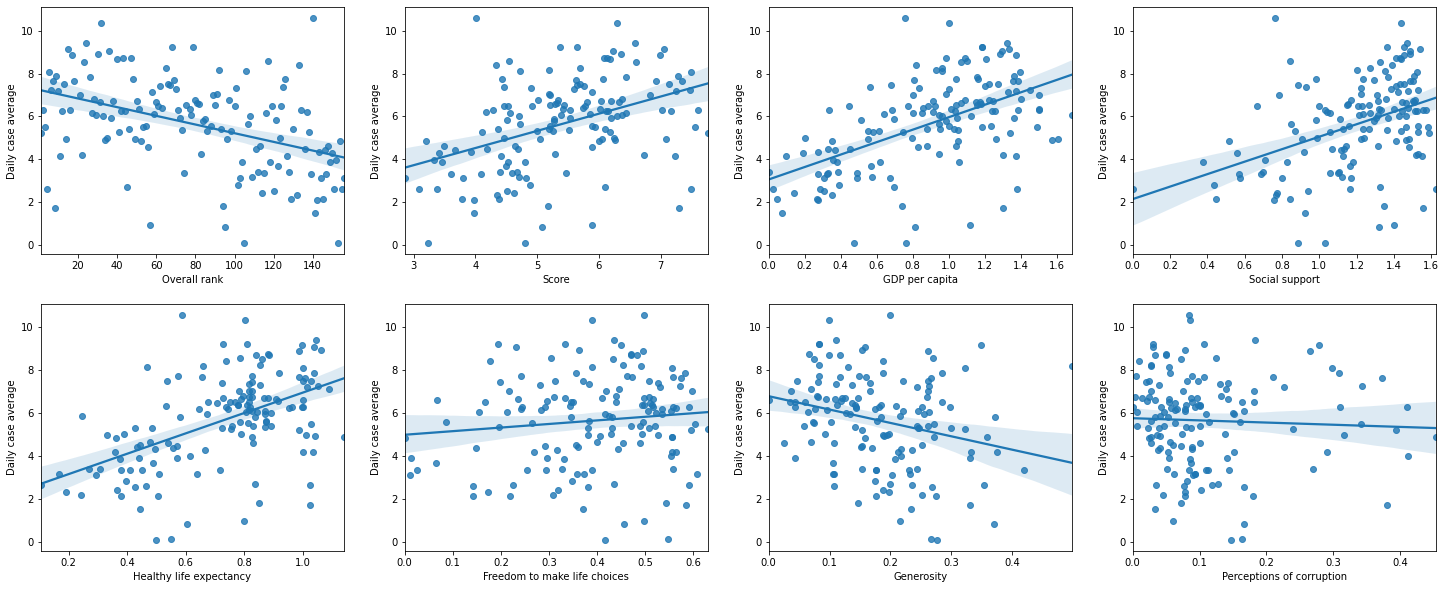

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(25,10))
sns.regplot(df["Overall rank"], np.log(df["Daily case average"]), ax=axes[0,0])
sns.regplot(df["Score"], np.log(df["Daily case average"]), ax=axes[0,1])
sns.regplot(df["GDP per capita"], np.log(df["Daily case average"]), ax=axes[0,2])
sns.regplot(df["Social support"], np.log(df["Daily case average"]), ax=axes[0,3])
sns.regplot(df["Healthy life expectancy"], np.log(df["Daily case average"]), ax=axes[1,0])
sns.regplot(df["Freedom to make life choices"], np.log(df["Daily case average"]), ax=axes[1,1])
sns.regplot(df["Generosity"], np.log(df["Daily case average"]), ax=axes[1,2])
sns.regplot(df["Perceptions of corruption"], np.log(df["Daily case average"]), ax=axes[1,3])


**CONCLUSION:** 
COVID-19 has hit developed countries more severely that less developed countries. It is probably because of underreporting in less developed countries. 